In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

## Iris Dataset

In [53]:
iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

In [54]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [55]:
def evaluation(y_test, y_pred, y_prob=0):
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

    return {
        'Accuracy': accuracy,
        'ROC AUC Score': roc_auc,
        'F1 Score': f1,
        'Precision Score': precision,
        'Recall Score': recall
    }

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
result = {}
for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_prob = classifier.predict_proba(x_test)
    result[name] = evaluation(y_test, y_pred, y_prob)

result = pd.DataFrame(result).T
print(result)

                         Accuracy  ROC AUC Score  F1 Score  Precision Score  \
Logistic Regression           1.0       1.000000  1.000000            1.000   
K-Nearest Neighbors           1.0       1.000000  1.000000            1.000   
Support Vector Machine        1.0       1.000000  1.000000            1.000   
Decision Tree                 1.0       1.000000  1.000000            1.000   
Random Forest                 1.0       1.000000  1.000000            1.000   
Gaussian Naive Bayes          1.0       1.000000  1.000000            1.000   
Multinomial Naive Bayes       0.9       0.990476  0.899248            0.925   
Bernoulli Naive Bayes         0.3       0.500000  0.138462            0.790   
Gradient Boosting             1.0       1.000000  1.000000            1.000   

                         Recall Score  
Logistic Regression               1.0  
K-Nearest Neighbors               1.0  
Support Vector Machine            1.0  
Decision Tree                     1.0  
Random Fo

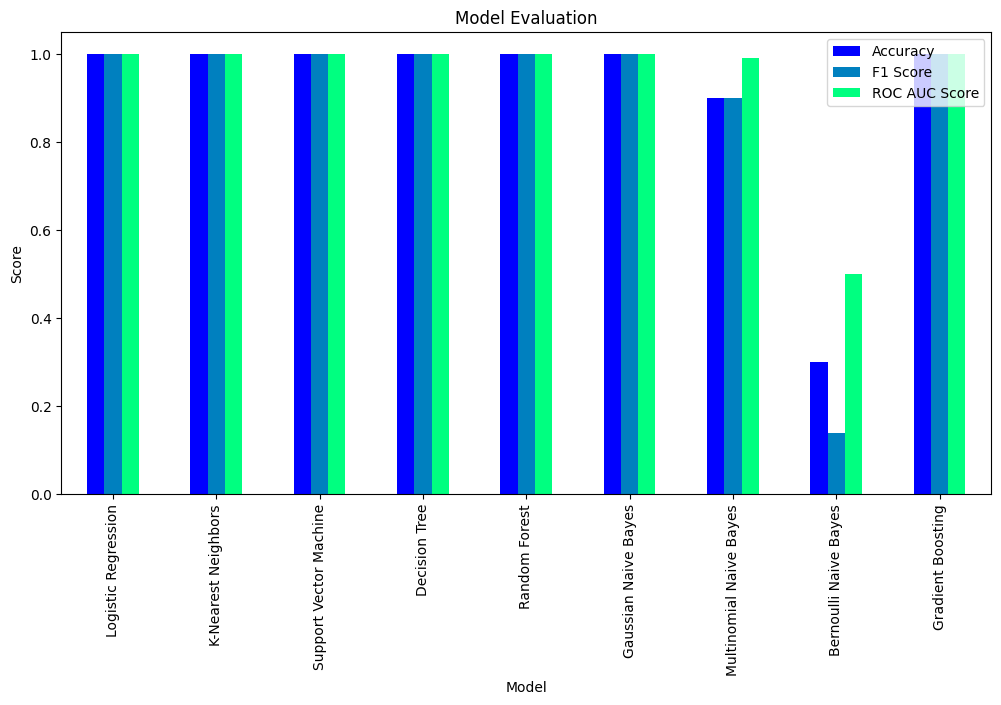

In [57]:
result[["Accuracy", "F1 Score", "ROC AUC Score"]].plot(kind='bar', figsize=(12, 6), colormap='winter')
plt.title('Model Evaluation')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

## Breast Cancer Dataset

In [58]:
breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target
target_names = breast_cancer.target_names

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
result = {}
for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_prob = classifier.predict_proba(x_test)[:, 1]
    result[name] = evaluation(y_test, y_pred, y_prob)

result = pd.DataFrame(result).T
print(result)

/Users/parthpsg/Documents/Professional/Coding/College Code/Third Year/ML/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                         Accuracy  ROC AUC Score  F1 Score  Precision Score  \
Logistic Regression      0.956140       0.997707  0.955801         0.956905   
K-Nearest Neighbors      0.956140       0.995906  0.955533         0.959026   
Support Vector Machine   0.947368       0.993449  0.946462         0.951470   
Decision Tree            0.938596       0.932362  0.938450         0.938457   
Random Forest            0.964912       0.996725  0.964738         0.965205   
Gaussian Naive Bayes     0.973684       0.998362  0.973481         0.974751   
Multinomial Naive Bayes  0.938596       0.985260  0.937318         0.944107   
Bernoulli Naive Bayes    0.622807       0.535211  0.478046         0.765082   
Gradient Boosting        0.956140       0.994432  0.956036         0.956088   

                         Recall Score  
Logistic Regression          0.956140  
K-Nearest Neighbors          0.956140  
Support Vector Machine       0.947368  
Decision Tree                0.938596  
Random Fo

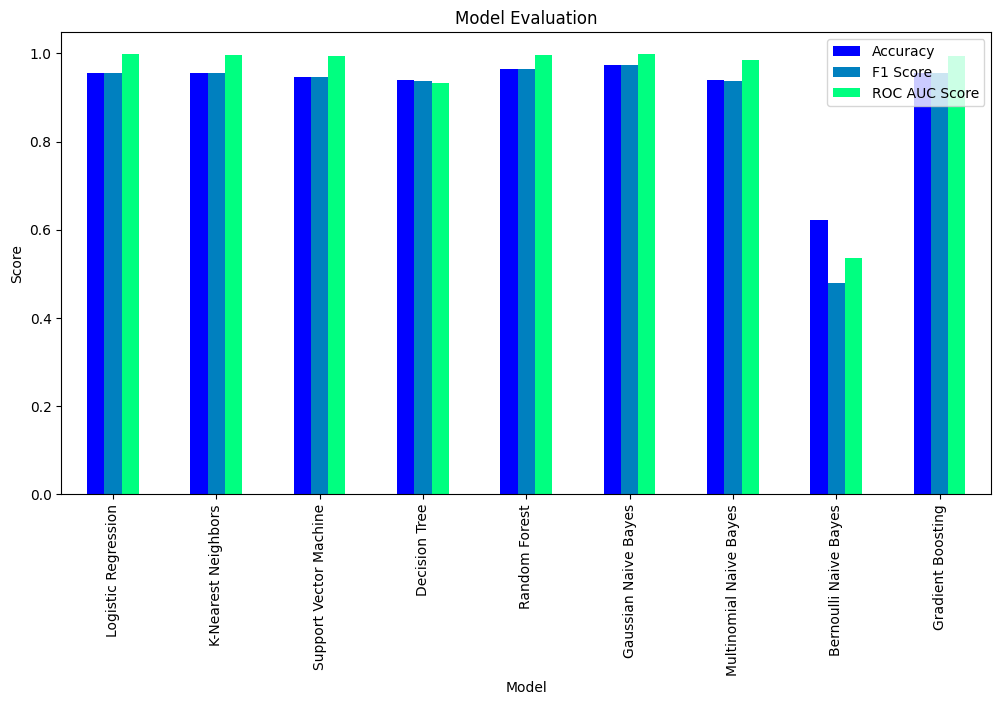

In [60]:
result[["Accuracy", "F1 Score", "ROC AUC Score"]].plot(kind='bar', figsize=(12, 6), colormap='winter')
plt.title('Model Evaluation')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()